# 2 Métodos Matemáticos para el Análisis de Algoritmos

Para cuantificar la eficiencia de los algoritmos, utilizamos funciones que miden, por ejemplo, cuánto tiempo demora un algoritmo en ejecutarse sobre una entrada dada, cuál es su peor caso sobre un conjunto de entradas posibles, o cuánto demora en promedio, suponiendo una cierta distribución de probabilidad de las entradas. Ocasionalmente, estudiaremos el uso de otro tipo de recursos, como por ejemplo la cantidad de memoria utilizada.

Es habitual que los resultados que obtengamos dependan de un parámetro $n$, que representa el tamaño del problema (por ejemplo, el número de elementos a ordenar, el número de elementos en un conjunto en el que hay que hacer una búsqueda, etc.). Por lo tanto, nuestras funciones serán normalmente *funciones discretas*, esto es funciones cuyo argumento es un número entero nonegativo. Como notación, para este tipo de funciones utilizaremos indistintamente una notación de funciones $f(n)$ o de sucesiones $f_n$.

Tal como en Física el estudio de funciones de variable continua $f(t)$ conduce a ecuaciones diferenciales que luego hay que resolver, acá el estudio de funciones de variable discreta $f(n)$ conducirá a *ecuaciones de recurrencia*, y en este capítulo veremos algunos métodos para resolver ese tipo de ecuaciones.

## Notación $O$

Al trabajar con funciones que pueden ser muy complicadas, en la práctica resulta útil poder ignorar los términos de orden inferior para concentrarse en el que determina la forma en que la función evoluciona cuando $n \rightarrow \infty$. También resulta útil en ese caso poder ignorar factores constantes, para concentrarse en la forma como la función depende de $n$.

Utilizaremos la notación
$$
f(n)=O(g(n))
$$
si existe una constante $C$ y un número $n_0$ tal que

$$
|f(n)| \le C|g(n)|
$$

para todo $n\ge n_0$.

Cuando la notación $O(g(n))$ aparezca en medio de una fórmula, representará a una función que cumple con la condición anterior.

Es importante notar que la notación $O$ provee una cota superior, la cual puede o no ser cercana a la función de la izquierda.
Más adelante veremos una notación más ajustada.

### Ejemplos

* $3n=O(n)$
* $2=O(1)$
* $2=O(n)$
* $3n+2=O(n)$

La notación $f(n)=O(g(n))$ es utilizada por la mayoría de los autores, pero hay que usarla con cuidado, porque la igualdad que ahí aparece **no es una relación reflexiva**.
En efecto, de $3n=O(n)$ y $2=O(n)$, **no** podemos deducir que $3n=2$.
Hay que tener presente siempre que lo que aparece a la derecha del signo igual contiene menos información que lo de la izquierda.

Para evitar las posible confusiones que podrían derivar de este uso no estándar del signo igual, algunos autores prefieren escribir

$$
f(n) \in O(g(n))
$$

en donde $O(g(n))$ se interpreta como el _conjunto_ de todas las funciones que acotan a $f(n)$ de la manera indicada.


## Notación $\Omega$

De manera análoga, se puede definir una notación de cota inferior.

Diremos que
$$
f(n)=\Omega(g(n))
$$
si existe una constante $C$ y un número $n_0$ tal que

$$
|f(n)|\ge C|g(n)|
$$

para todo $n\ge n_0$.

### Ejemplos

* $3=\Omega(1)$
* $3n=\Omega(n)$
* $3n=\Omega(1)$
* $3n+2=\Omega(n)$

## Notación $\Theta$

La notación $\Theta$ nos permite especificar el orden exacto de crecimiento de una función.

Diremos que
$$
f(n)=\Theta(g(n))
$$
si $f(n)=O(g(n))$ y $f(n)=\Omega(g(n))$

### Ejemplo

* $3n+2=\Theta(n)$

Esta notación enfatiza que lo más importante, cuando $n$ crece, es el orden de magnitud de las funciones, y que podemos ignorar constantes multiplicativas y términos de orden inferior para comparar funciones a largo plazo.

Por otra parte, si por alguna razón queremos comparar funciones para $n$ pequeño, ahí toda la información es significativa, y como muestra el siguiente gráfico, en ese rango una solución "ineficiente" puede resultar preferible a otra que solo es eficiente para $n$ grande:

In [1]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


<>:3: SyntaxWarning: invalid escape sequence '\l'
<>:3: SyntaxWarning: invalid escape sequence '\l'
C:\Users\gonza\AppData\Local\Temp\ipykernel_18708\3565839060.py:3: SyntaxWarning: invalid escape sequence '\l'
  plt.plot(n,log(n)+8, label='$\log{n}+8$')


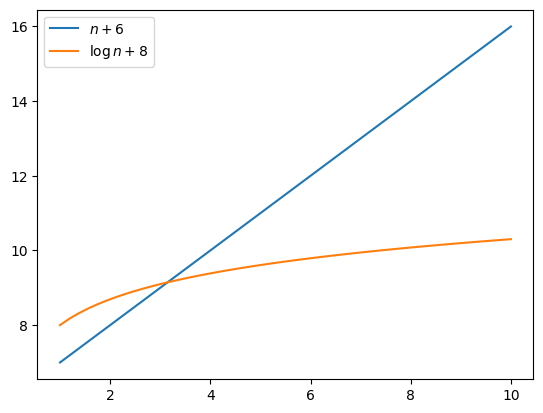

In [2]:
n=linspace(1,10)
plt.plot(n,n+6,label='$n+6$')
plt.plot(n,log(n)+8, label='$\log{n}+8$')
leg=plt.legend(loc='best')

<>:3: SyntaxWarning: invalid escape sequence '\l'
<>:3: SyntaxWarning: invalid escape sequence '\l'
C:\Users\gonza\AppData\Local\Temp\ipykernel_18708\3899693202.py:3: SyntaxWarning: invalid escape sequence '\l'
  plt.plot(n,2*n*log(n)+5, label='$2n\log{n}+5$')


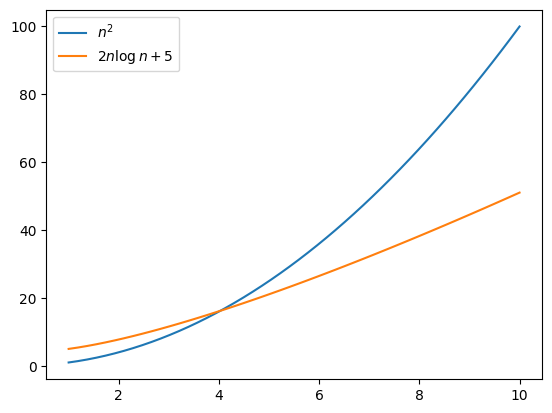

In [4]:
n=linspace(1,10)
plt.plot(n,n*n, label='$n^2$')
plt.plot(n,2*n*log(n)+5, label='$2n\log{n}+5$')
leg=plt.legend(loc='best')
plt.show()

## Ecuaciones de Recurrencia

Al estudiar la eficiencia de algoritmos, a menudo podremos escribir ecuaciones que relacionan el valor de la función en $n$ con los valores de la función en $n-1$, $n-2$, etc. Para que estas ecuaciones tengan solución única, debemos especificar además las *condiciones iniciales*, también llamadas *condiciones de borde*.

### Ejemplo: Número de movidas en las Torres de Hanoi

$$
\begin{align}
a_n &= 2 a_{n-1} + 1 \text{ para } n\ge 1\\
a_0 &= 0
\end{align}
$$

### Ejemplo: Números de Fibonacci

$$
\begin{align}
f_n &= f_{n-1}+f_{n-2} \text{ para } n\ge 2\\
f_0 &= 0\\
f_1 &= 1
\end{align}
$$

## Resolución de Ecuaciones Lineales de Primer Orden

Consideremos ecuaciones de la forma

$$
a_{n}=ba_{n-1}+c_{n}
$$

donde $b$ es una constante distinta de cero y $c_n$ es una función conocida.

Para ver cómo resolver este tipo de ecuaciones, a modo de "precalentamiento", veamos cómo resolver esta ecuación para el caso $b=1$:

$$
a_{n}=a_{n-1}+c_{n}
$$

Esto se puede reescribir como

$$
a_{n}-a_{n-1}=c_{n}
$$

y ahora introducimos sumatoria en ambos lados:

$$
\sum_{1\le k \le n}(a_{k}-a_{k-1})=\sum_{1\le k \le n}c_{k}
$$

Pero la suma de la izquierda es telescópica, así que el resultado es:

$$
a_n = a_0 + \sum_{1\le k \le n}c_{k}
$$

Abordemos ahora el caso general. La idea es tomar la ecuación $a_{n}=ba_{n-1}+c_{n}$ y reducirla de alguna manera al caso $b=1$ que ya sabemos resolver.

Para esto, dividiremos ambos lados de la ecuación por el _factor sumante_ $b^n$, obteniendo

$$
\frac{a_{n}}{b^n}=\frac{a_{n-1}}{b^{n-1}}+\frac{c_{n}}{b^n}
$$

Si ahora hacemos la sustitución $A_n = a_n/b^n$ y $C_n = c_n/b^n$, la ecuación queda en la forma

$$
A_{n}=A_{n-1}+C_{n}
$$

que ya sabemos cómo resolver:

$$
A_n = A_0 + \sum_{1\le k \le n}C_{k}
$$

Haciendo ahora la sustitución inversa, obtenemos el resultado:

$$
a_{n}=a_{0}b^{n}+\sum_{1\leq k\leq n}c_{k}b^{n-k}
$$

## Ejemplo: Número de Movidas en las Torres de Hanoi

La ecuación

$$
\begin{align}
a_n &= 2 a_{n-1} + 1 \text{ para } n\ge 1\\
a_0 &= 0
\end{align}
$$

tiene como solución

$$
a_{n}=\sum_{1\leq k\leq n}2^{n-k}=\sum_{0\leq k\leq n-1}2^{k}
$$

lo cual se simplifica a

$$
a_{n}=2^{n}-1
$$

---

## Resolución de Ecuaciones Lineales Homogéneas con Coeficientes Constantes

Consideremos por ejemplo la ecuación de Fibonacci

$$
\begin{align}
f_n &= f_{n-1}+f_{n-2} \text{ para } n\ge 2\\
f_0 &= 0\\
f_1 &= 1
\end{align}
$$

La siguiente tabla muestra los valores que toma esta función:

| $𝑛$  | 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12 | 13 | 14 | 15 | 16 | 17 | 18 | 19 | 20 |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| $f_n$ | 0 | 1 | 1 | 2 | 3 | 5 | 8 | 13 | 21 | 34 | 55 | 89 | 144 | 233 | 377 | 610 | 987 | 1597 | 2584 | 4181 | 6765 |



Como se ve, el crecimiento es bastante rápido. Esto es porque este tipo de ecuaciones suele tener soluciones de tipo exponencial, esto es, soluciones de la forma

$$
f_n = \lambda^n
$$

para alguna constante $\lambda$.
Además, si encontramos más de una constante $\lambda$ para la cual se satisfaga la ecuación, por ser una ecuación lineal, cualquier combinación lineal de esas soluciones también será solución.

Si logramos encontrar una solución que cumpla las condiciones iniciales bajo este supuesto, no necesitamos seguir buscando, porque la solucion es única.

Sustituyendo $\lambda^n$ en lugar de $f_n$, y dividiendo ambos lados por $\lambda^{n-2}$ obtenemos la siguiente ecuación

$$
\lambda^{2}-\lambda-1=0
$$

llamada la _ecuación característica_ de la ecuación de recurrencia.

Resolviendo esta ecuación de segundo grado, obtenemos las raíces

$$
\phi=\frac{1+\sqrt{5}}{2}\approx1.618\ldots,\qquad\hat{\phi}=\frac{1-\sqrt{5}}{2}\approx-0.618\ldots
$$

La solución general sería una combinación lineal de estas soluciones:

$$
f_{n}=A\phi^{n}+B\hat{\phi}^{n}
$$

La condición inicial $f_0=0$ implica que $B=-A$, y por lo tanto

$$
f_{n}=A(\phi^{n}-\hat{\phi}^{n})
$$

La segunda condición inicial, $f_1=1$, implica que

$$
A(\phi-\hat{\phi})=A\sqrt{5}=1
$$

Con lo cual obtenermos la siguiente fórmula para los números de Fibonacci:

$$
f_{n}=\frac{1}{\sqrt{5}}(\phi^{n}-\hat{\phi}^{n})
$$

Nótese que como $|\hat{\phi}|<1$, el aporte del segundo término tiende a cero rápidamente, y $f_n=\Theta(\phi^n)$.

In [4]:
import math
def f(n):
    r5=math.sqrt(5)
    phi=(1+r5)/2
    phihat=(1-r5)/2
    return 1/r5*(phi**n-phihat**n)

In [5]:
print(f(10), f(15), f(20))

55.000000000000014 610.0000000000003 6765.000000000005


El "ruido" que es observa en las cifras finales es producto de los errores de truncación al representar irracionales como $\sqrt{5}$ en punto flotante. Si expandiéramos las fórmulas y simplificáramos, obtendríamos los valores exactos.

## Ejemplo: Número de movidas en las Torres de Hanoi

Veamos ahora una nueva manera de resolver la ecuación de Hanoi, la cual podemos rescribir como

$$
\begin{align}
a_n - 2 a_{n-1} &= 1 \text{ para } n\ge 1\\
a_0 &= 0
\end{align}
$$

Ésta es una ecuación lineal de coeficientes constantes *no homogénea*, de modo que el método que acabamos de ver no es directamente aplicable.

Si definimos el operador $\Delta$ como $\Delta a_n = a_{n+1}-a_n$, podemos transformar esta ecuación en una ecuación homogénea aplicando el operador $\Delta$ a ambos lados:

$$
\Delta (a_n - 2 a_{n-1}) = \Delta 1
$$

$$
(a_{n+1}-2a_n)-(a_n-2a_{n-1})=1-1
$$

esto es

$$
a_{n+1}-3a_n+2a_{n-1}=0
$$

De manera similar, cualquier ecuación de este tipo en que la parte no homogénea es un polinomio en $n$ puede convertirse en una ecuación homogénea por aplicaciones reiteradas del operador $\Delta$.

Si "pasamos en limpio" esta ecuación de modo que su término líder sea $a_n$, se ve que la nueva ecuación sólo es válida para $n\ge 2$, de modo que se necesita una segunda condición inicial, la cual se obtiene sin problemas desde la ecuación original.

---

## El Teorema Maestro

Veremos diversos algoritmos que dan origen a recurrencias de la forma

$$
T(n)=pT(\frac{n}{q})+Cn^r
$$

Para simplificar, supongamos que $n$ es una potencia de $q$, digamos $n=q^k$, para que la división $n/q$ siempre se pueda hacer en forma exacta.
Entonces

$$
T(q^{k})=pT(q^{k-1})+C(q^r)^{k}
$$

Si introducimos una nueva función incógnita $a_k = T(q^{k})$, podemos reescribir la ecuación como

$$
a_{k}=pa_{k-1}+C(q^r)^{k}
$$

la cual es de un tipo que ya sabemos resolver.
Su solución es

$$
\begin{align}
a_{k} & =a_{0}p^{k}+C\sum_{1\leq j\leq k}(q^r)^{j}p^{k-j}\\
      & = p^k \left( a_0 + C \sum_{1\leq j\leq k} \left(\frac{q^r}{p}\right)^j \right)
\end{align}
$$

El comportamiento de esta sumatoria depende de si el cuociente $q^r/p$ es menor, igual o mayor que $1$.

Antes de analizar cada caso, observemos que $n=q^k$ implica que $k=\log_q{n}$, y

$$
p^k = p^{\log_{q}n}=(q^{\log_{q}p})^{\log_{q}n}=(q^{\log_{q}n})^{\log_{q}p}=n^{\log_{q}p}
$$

con lo cual la solución puede escribirse como

$$
T(n)=n^{\log_{q}p} \left( T(1)+C \sum_{1\leq j\leq\log_{q}n} \left(\frac{q^r}{p}\right)^{j}\right)
$$

### Caso $q^r<p$:

En este caso, la sumatoria está acotada por una constante, porque la serie respectiva es convergente, de modo que

$$
T(n)=\Theta(n^{\log_{q}p})
$$

### Caso $q^r=p$:

En este caso la sumatoria es logarítmica, y $\log_q{p}=r$, de modo que

$$
T(n) = \Theta(n^r \log{n})
$$

### Caso $q^r>p$:

En este caso la sumatoria es la suma de una progresión geométrica, que podemos escribir en forma cerrada como

$$
\begin{align}
T(n) &= n^{\log_q{p}}\left( T(1)+C\frac{q^r}{p}\frac{\left( \frac{q^r}{p} \right) ^{\log_q{n}}-1}{\frac{q^r}{p}-1}  \right)\\
     &= \Theta(n^{\log_q{p}}+n^r)\\
     & = \Theta(n^r) \text{ porque } \log_q{p}<r
\end{align}
$$

En conclusión, hemos demostrado lo siguiente:

### Teorema Maestro

La ecuación

$$
T(n)=pT(\frac{n}{q})+Cn^r
$$

tiene solución

$$
T(n) =
\begin{cases}
\Theta(n^r) & \text{ si } p<q^r\\
\Theta(n^r \log{n}) & \text{ si } p=q^r\\
\Theta(n^{\log_q{p}}) & \text{ si } p>q^r
\end{cases}
$$

---